# Welch powell

In [44]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, df):
        self.df = df
        self.vertex_dict = {}
        self.adjMatrix = None
        self.index_dict = {}
        self.G = nx.Graph()

    def get_adjacency_matrix(self):
        if self.adjMatrix is None:
            print("Graph not yet built.")
            return None
        return self.adjMatrix

    def build_graph(self):
        unique_vertices = pd.unique(self.df[['Kecamatan A', 'Kecamatan B']].values.ravel('K'))
        self.vertex_dict = {vertex: idx for idx, vertex in enumerate(unique_vertices)}
        self.index_dict = {idx: vertex for vertex, idx in self.vertex_dict.items()}

        num_vertices = len(self.vertex_dict)
        self.adjMatrix = np.zeros((num_vertices, num_vertices), dtype=int)

        for _, row in self.df.iterrows():
            v1 = self.vertex_dict[row['Kecamatan A']]
            v2 = self.vertex_dict[row['Kecamatan B']]
            self.adjMatrix[v1][v2] = 1
            self.adjMatrix[v2][v1] = 1
            self.G.add_edge(row['Kecamatan A'], row['Kecamatan B'])

    def welsh_powell_coloring(self):
        Ma = self.adjMatrix
        sommets = list(self.vertex_dict.keys())
        degres, result = [], []
        nb = 0

        for sommet in sommets:
            degres.append(np.sum(self.adjMatrix[self.vertex_dict[sommet]]))
            result.append(0)

        degres.sort(reverse=True)
        colors = {}

        for i in range(len(degres)):
            if result[i] == 0:
                nb += 1
                color = "#{:06x}".format(np.random.randint(0, 0xFFFFFF))  # Generate random hex color
                result[i] = color

                for j in range(len(degres)):
                    if Ma[i][j] == 0 and result[j] == 0:
                        for k in range(len(degres)):
                            passe = 0
                            if Ma[j][k] == 1 and result[k] == result[i]:
                                passe = 1
                                break
                        if passe == 0:
                            result[j] = result[i]

        for i, sommet in enumerate(sommets):
            colors[sommet] = result[i]

        return colors

    def visualize_colored_graph(self, colors):
        if self.adjMatrix is None:
            print("Graph not yet built.")
            return

        plt.figure(figsize=(12, 12))
        pos = nx.kamada_kawai_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, font_weight='bold', node_size=700,
                node_color=[colors[vertex] for vertex in self.G.nodes])
        plt.title('Colored Graph')
        plt.show()

    def visualize_default_graph(self, color='#56D998'):
        if self.adjMatrix is None:
            print("Graph not yet built.")
            return

        plt.figure(figsize=(12, 12))
        pos = nx.kamada_kawai_layout(self.G)
        nx.draw(self.G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=color)
        plt.title('Default Colored Graph')
        plt.show()

    def print_array(self):
        if self.adjMatrix is None:
            print("Graph not yet built.")
            return

        # Membuat DataFrame untuk tampilan yang lebih baik
        df_adj = pd.DataFrame(self.adjMatrix, index=self.vertex_dict.keys(), columns=self.vertex_dict.keys())
        print("Adjacency Matrix:")
        print(df_adj)

    def get_vertex_color(self, vertex, colors):
        return colors.get(vertex, None)

    def print_same_color_courses(self, colors):
        if not colors:
            print("Colors not available.")
            return

        courses_by_color = {}
        for vertex, color in colors.items():
            if color not in courses_by_color:
                courses_by_color[color] = [vertex]
            else:
                courses_by_color[color].append(vertex)

        print("Courses with the same color:")
        for color, vertices in courses_by_color.items():
            print(f"Color {color}: {vertices}")


# Membaca DataFrame dan membangun graf
df = pd.read_excel('RS Surabaya tubes.xlsx')
g = Graph(df)
g.build_graph()



# Pewarnaan dan visualisasi graf setelah pewarnaan
colors = g.welsh_powell_coloring()



In [45]:
# Menampilkan kecamatan dengan warna yang sama
g.print_same_color_courses(colors)

Courses with the same color:
Color #4e5970: ['Asemrowo', 'Gubeng', 'Tambaksari']
Color #153723: ['Benowo', 'Sawahan']
Color #1a2075: ['Bubutan', 'Mulyorejo']
Color #8ddc4d: ['Bulak', 'Sukolilo']
Color #d08433: ['Dukuh Pakis', 'Sukomanunggal', 'Wiyung', 'Wonokromo']
Color #9792c1: ['Gayungan']
Color #914ec0: ['Genteng', 'Rungkut']
Color #ea3313: ['Gunung Anyar']
Color #bec79a: ['Jambangan']
Color #5e134c: ['Karang Pilang']
Color #f23ae7: ['Kenjeran']
Color #d75f1e: ['Krembangan']
Color #9062ba: ['Lakarsantri']
Color #f1e51b: ['Pabean Cantian']
Color #0ef6e0: ['Pakal']
Color #6ff67c: ['Sambikerep']
Color #fc489d: ['Semampir']
Color #874cef: ['Simokerto']
Color #c7a581: ['Tandes']
Color #d3a5f9: ['Tegalsari', 'Wonocolo']
Color #6c4d02: ['Tenggilis Mejoyo']


In [46]:
# Menampilkan matriks ketetanggaan
g.print_array()

Adjacency Matrix:
                  Asemrowo  Benowo  Bubutan  Bulak  Dukuh Pakis  Gayungan  \
Asemrowo                 0       1        1      1            1         1   
Benowo                   1       0        1      1            1         1   
Bubutan                  1       1        0      1            1         1   
Bulak                    1       1        1      0            1         1   
Dukuh Pakis              1       1        1      1            0         1   
Gayungan                 1       1        1      1            1         0   
Genteng                  1       1        1      1            1         1   
Gubeng                   0       1        0      0            0         0   
Gunung Anyar             1       1        1      1            1         1   
Jambangan                1       1        1      1            1         1   
Karang Pilang            1       1        1      1            1         1   
Kenjeran                 1       1        1      1        

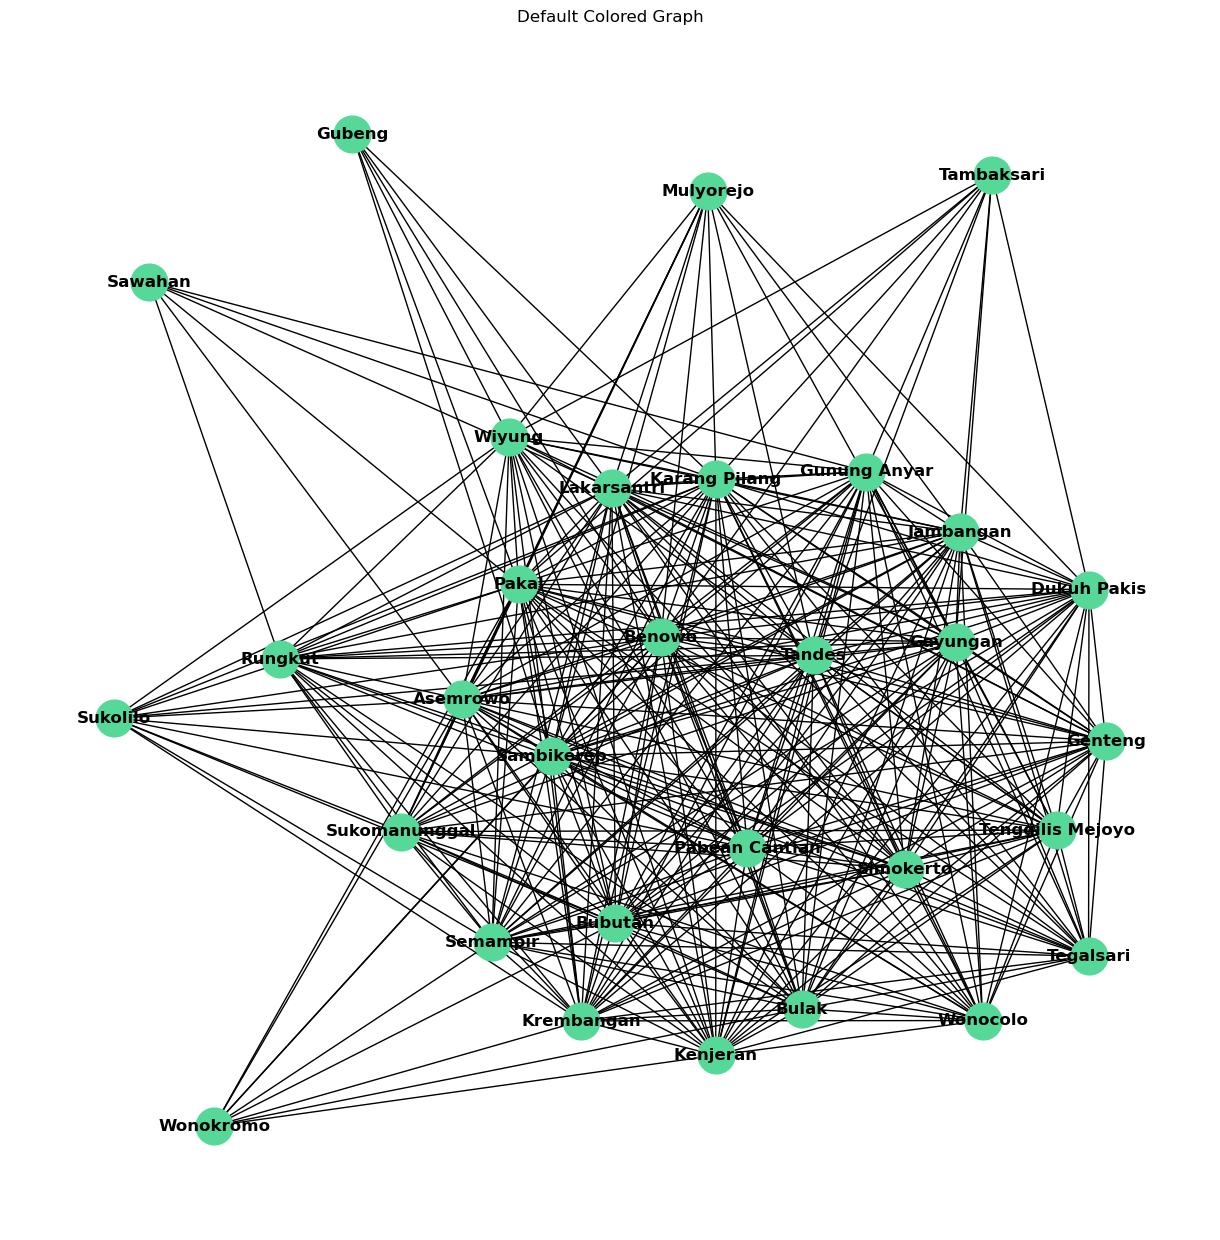

In [47]:
# Visualisasi graf sebelum pewarnaan
g.visualize_default_graph()

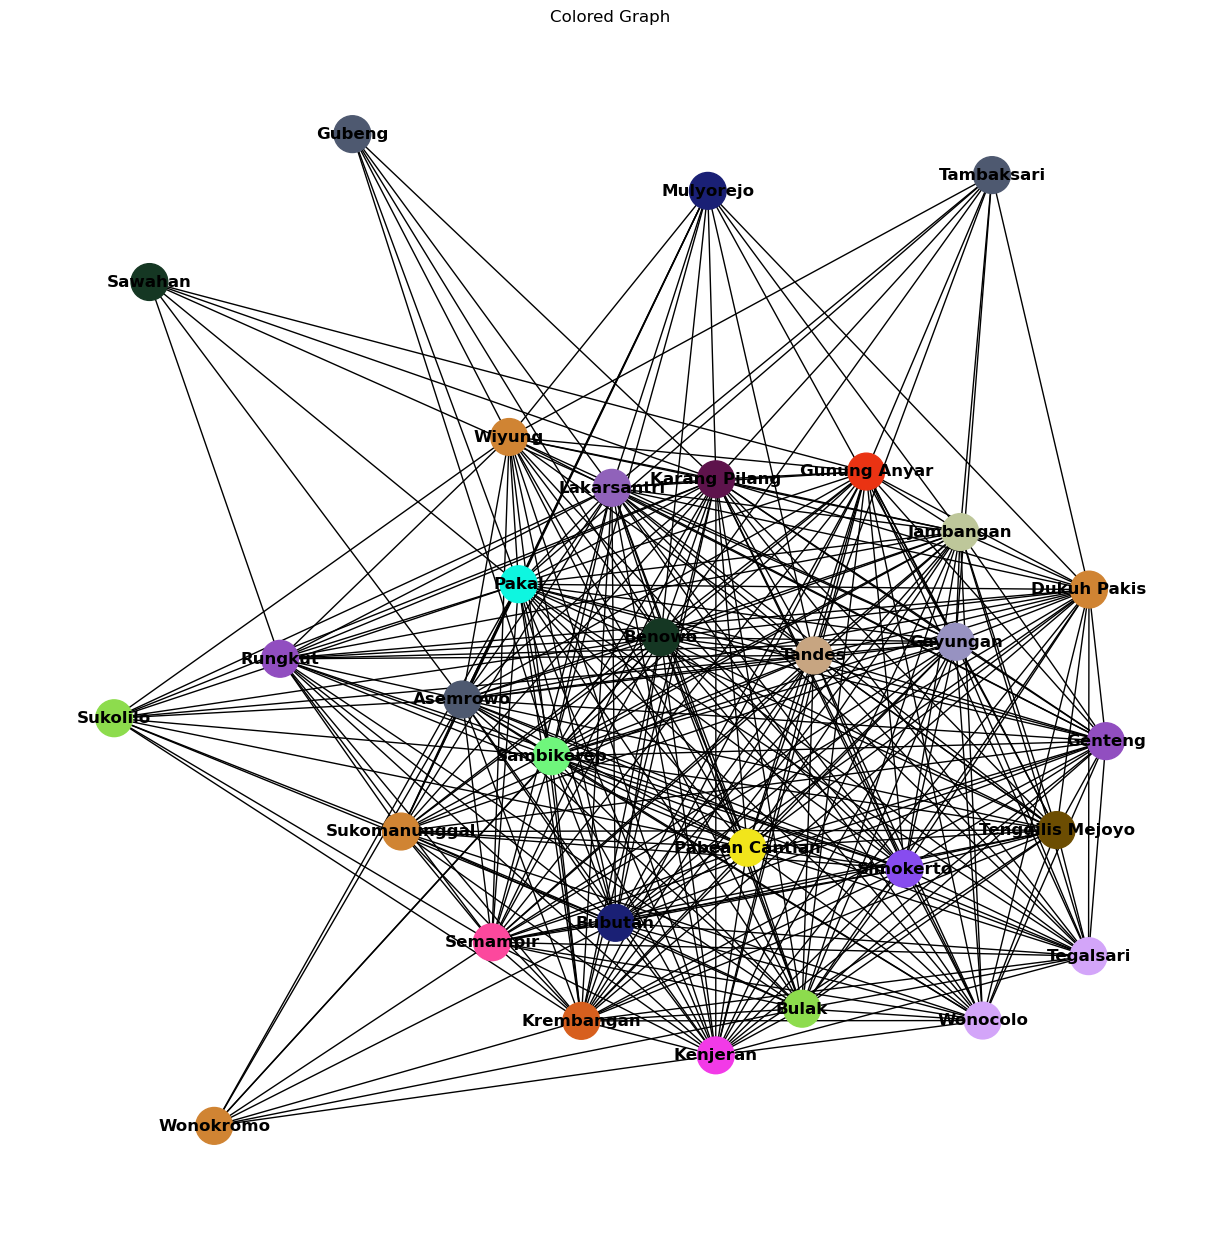

In [48]:
# Visualize the colored graph
g.visualize_colored_graph(colors)

In [49]:
# Mencari jumlah derajat per kecamatan
degree_per_kecamatan = np.sum(g.adjMatrix, axis=1)

# Menambahkan informasi jumlah derajat ke DataFrame
df_degree = pd.DataFrame({'Kecamatan': g.vertex_dict.keys(), 'Degree': degree_per_kecamatan})
df_degree.set_index('Kecamatan', inplace=True)

# Menampilkan DataFrame dengan jumlah derajat per kecamatan
print("Degree per Kecamatan:")
print(df_degree)


Degree per Kecamatan:
                  Degree
Kecamatan               
Asemrowo              28
Benowo                29
Bubutan               26
Bulak                 25
Dukuh Pakis           24
Gayungan              26
Genteng               23
Gubeng                 6
Gunung Anyar          25
Jambangan             26
Karang Pilang         29
Kenjeran              25
Krembangan            26
Lakarsantri           28
Mulyorejo             12
Pabean Cantian        25
Pakal                 30
Rungkut               20
Sambikerep            26
Semampir              26
Simokerto             24
Sukolilo              13
Sukomanunggal         22
Tambaksari            10
Tandes                26
Tegalsari             20
Tenggilis Mejoyo      23
Sawahan                6
Wiyung                21
Wonocolo              21
Wonokromo              9
